In [3]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [85]:
runs = 500
rotor_fail = []

rotor_nom = 79.1
rotor_tol_upp = 0.15
rotor_tol_lwr = -0.15

rotor_go = 78.960
rotor_nogo = 79.240

rotor_mean = rotor_nom
rotor_sd = (abs(rotor_tol_upp) + abs(rotor_tol_lwr))/6


In [86]:
start = time()

rotors = np.random.normal(rotor_mean, rotor_sd, runs)

rotor_pass = np.count_nonzero(np.where(rotors - rotor_go >= 0, 1, 0))*100/runs

end = time()
print(end - start)

0.0005004405975341797


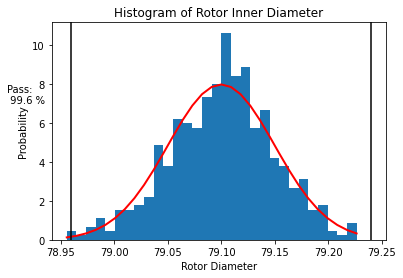

In [87]:
count, bins, ignored = plt.hist(rotors,30, density=True)
plt.plot(bins, 1/(rotor_sd * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - rotor_mean)**2 / (2 * rotor_sd**2) ),
         linewidth=2, color='r')



plt.axvline(x=rotor_go, color='k')
plt.axvline(x=rotor_nogo, color='k')

plt.xlabel('Rotor Diameter')
plt.ylabel('Probability')
plt.title('Histogram of Rotor Inner Diameter')
plt.text(78.9, 7, 'Pass: \n %s %%'%(rotor_pass))
#plt.grid(True)
plt.show()
